In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
df= pd.read_csv("Time Americans Spend Sleeping.csv")
df.head(3)

,index,Year,Period,Avg hrs per day sleeping,Standard Error,Type of Days,Age Group,Activity,Sex
0,0,2003,Annual,8.57,0.018,All days,15 years and over,Sleeping,Both
1,1,2004,Annual,8.55,0.026,All days,15 years and over,Sleeping,Both
2,2,2005,Annual,8.62,0.023,All days,15 years and over,Sleeping,Both


In [62]:
df.shape

(945, 9)

In [63]:
df.tail(2)

,index,Year,Period,Avg hrs per day sleeping,Standard Error,Type of Days,Age Group,Activity,Sex
943,943,2016,Annual,8.92,0.071,Nonholiday weekdays,65 years and over,Sleeping,Women
944,944,2017,Annual,8.81,0.091,Nonholiday weekdays,65 years and over,Sleeping,Women


In [64]:
df[21:26]

,index,Year,Period,Avg hrs per day sleeping,Standard Error,Type of Days,Age Group,Activity,Sex
21,21,2009,Annual,8.39,0.031,Nonholiday weekdays,15 years and over,Sleeping,Both
22,22,2010,Annual,8.38,0.031,Nonholiday weekdays,15 years and over,Sleeping,Both
23,23,2011,Annual,8.45,0.034,Nonholiday weekdays,15 years and over,Sleeping,Both
24,24,2012,Annual,8.45,0.034,Nonholiday weekdays,15 years and over,Sleeping,Both
25,25,2013,Annual,8.48,0.036,Nonholiday weekdays,15 years and over,Sleeping,Both


In [65]:
df['Type of Days']

0                 All days
1                 All days
2                 All days
3                 All days
4                 All days
              ...         
940    Nonholiday weekdays
941    Nonholiday weekdays
942    Nonholiday weekdays
943    Nonholiday weekdays
944    Nonholiday weekdays
Name: Type of Days, Length: 945, dtype: object

In [66]:
df['Avg hrs per day sleeping'].max()

10.65

In [67]:
df[df['Avg hrs per day sleeping'] > 10.6]

,index,Year,Period,Avg hrs per day sleeping,Standard Error,Type of Days,Age Group,Activity,Sex
403,403,2016,Annual,10.65,0.189,Weekend days and holidays,15 to 24 years,Sleeping,Men


In [68]:
df.describe()

,index,Year,Avg hrs per day sleeping,Standard Error
count,945.000000,945.000000,945.000000,945.000000
mean,472.000000,2010.000000,8.806868,0.086958
std,272.942302,4.322782,0.545001,0.034631
min,0.000000,2003.000000,7.720000,0.018000
25%,236.000000,2006.000000,8.360000,0.063000
50%,472.000000,2010.000000,8.810000,0.084000
75%,708.000000,2014.000000,9.190000,0.106000
max,944.000000,2017.000000,10.650000,0.228000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     945 non-null    int64  
 1   Year                      945 non-null    int64  
 2   Period                    945 non-null    object 
 3   Avg hrs per day sleeping  945 non-null    float64
 4   Standard Error            945 non-null    float64
 5   Type of Days              945 non-null    object 
 6   Age Group                 945 non-null    object 
 7   Activity                  945 non-null    object 
 8   Sex                       945 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 48.1+ KB


In [70]:
# QUESTIONS TO BE ANSWERED

# which year is the sleeping average high  --------------------------------------- 2015 has the highest sleeping average
# Is sleeping average high for men or women --------------------------------------  Women sleep morethan men
# Which age group has highest and lowest sleeping average ------------------------ 15-24 has highest, 45-54 has lowest sleeping averages
# Which type of days has highest sleeping average in overall years --------------- weekwnds and holidays has highest average
# overall sleeping average from the data set ------------------------------------- 8.806867724867725

In [71]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include = numerics)
numeric_df.columns       
#to find number of numeric columns in the data set

Index(['index', 'Year', 'Avg hrs per day sleeping', 'Standard Error'], dtype='object')

In [72]:
df.isna().sum().sort_values(ascending = False)
#number of null values per column
# df.isna() gives each value a true or false if it's null or not - try it 

index                       0
Year                        0
Period                      0
Avg hrs per day sleeping    0
Standard Error              0
Type of Days                0
Age Group                   0
Activity                    0
Sex                         0
dtype: int64

In [73]:
#as there are no null values, we are good to go

df['Type of Days'].unique()

array(['All days', 'Nonholiday weekdays', 'Weekend days and holidays'],
      dtype=object)

In [74]:
df['Age Group'].unique()

array(['15 years and over', '15 to 24 years', '25 to 34 years',
       '35 to 44 years', '45 to 54 years', '55 to 64 years',
       '65 years and over'], dtype=object)

In [75]:
df['Type of Days'].value_counts()

All days                     315
Nonholiday weekdays          315
Weekend days and holidays    315
Name: Type of Days, dtype: int64

In [76]:
df_grouped = df.groupby(by="Year")["Avg hrs per day sleeping"].sum()
df_grouped.sort_values(ascending = False)

Year
2015    563.03
2017    561.84
2016    561.61
2014    560.84
2012    557.54
2013    557.26
2011    556.47
2009    554.16
2010    554.11
2006    551.75
2005    550.97
2008    550.10
2003    548.22
2007    547.89
2004    546.70
Name: Avg hrs per day sleeping, dtype: float64

In [77]:
type(df_grouped)

pandas.core.series.Series

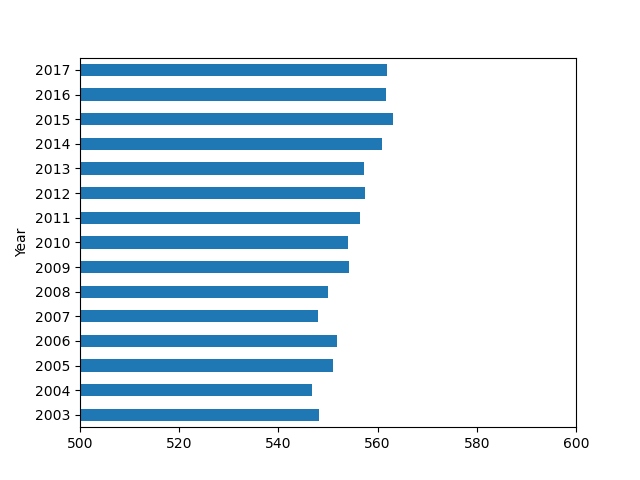

In [82]:
df_grouped.plot(kind = 'barh')

plt.xlim(500,600)
plt.show()

In [83]:
df_agegrouped = df.groupby(by="Age Group")["Avg hrs per day sleeping"].sum()
df_agegrouped.sort_values(ascending = False)

Age Group
15 to 24 years       1282.40
65 years and over    1210.39
15 years and over    1189.39
25 to 34 years       1187.07
35 to 44 years       1159.14
55 to 64 years       1148.75
45 to 54 years       1145.35
Name: Avg hrs per day sleeping, dtype: float64

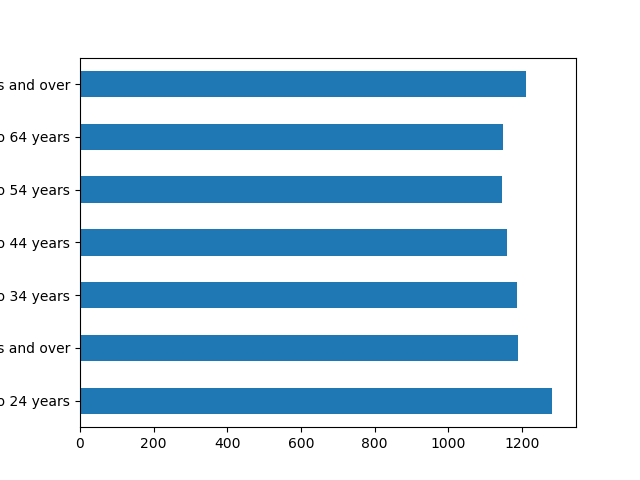

In [84]:
df_agegrouped.plot(kind = 'barh')
plt.show()

In [85]:
df_daygrouped = df.groupby(by="Type of Days")["Avg hrs per day sleeping"].sum()
df_daygrouped.sort_values(ascending = False)

Type of Days
Weekend days and holidays    2940.47
All days                     2734.65
Nonholiday weekdays          2647.37
Name: Avg hrs per day sleeping, dtype: float64

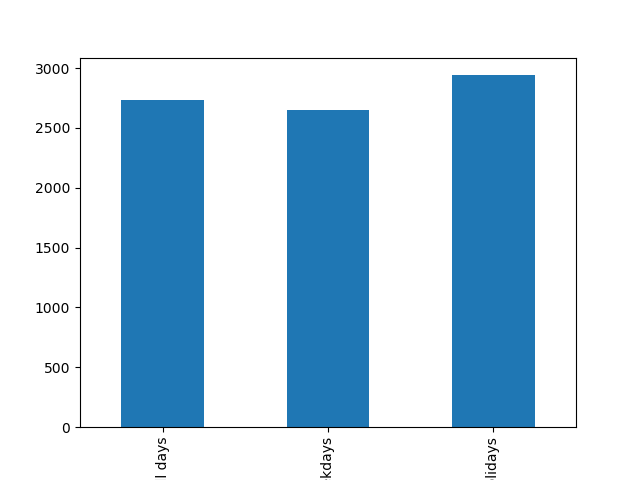

In [86]:
df_daygrouped.plot(kind = 'bar')
plt.show()

In [88]:
df_sexgrouped = df.groupby(by="Sex")["Avg hrs per day sleeping"].sum()
df_sexgrouped.sort_values(ascending = False)

Sex
Women    2797.57
Both     2774.47
Men      2750.45
Name: Avg hrs per day sleeping, dtype: float64

In [94]:
df_avg = df["Avg hrs per day sleeping"].sum()/ len(df.index)
df_avg

8.806867724867725

In [93]:
len(df.index)

945